In [5]:
import san
from src_end2end import statistical_features
import lsa_features
import pickle
import numpy as np
from tqdm import tqdm
import pandas as pd
import os
import skopt
from skopt import gp_minimize
from sklearn import preprocessing
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from sklearn.metrics import f1_score
st_models = ["roberta-large-nli-stsb-mean-tokens", "xlm-r-large-en-ko-nli-ststb", "distilbert-base-nli-mean-tokens"]


In [130]:
from sentence_transformers import SentenceTransformer
st_models = ["roberta-large-nli-stsb-mean-tokens", "xlm-r-large-en-ko-nli-ststb", "distilbert-base-nli-mean-tokens"]
def embedd_bert(text, st_model = 'paraphrase-distilroberta-base-v1', split = 'train'):    
    paths = "temp_berts/"+st_model+"_"+split+'.pkl'
    if os.path.isfile(paths):
        sentence_embeddings = pickle.load(open(paths,'rb')) 
        return sentence_embeddings
    model = SentenceTransformer(st_model)
    sentence_embeddings = model.encode(text)
    with open(paths, 'wb') as f:
        pickle.dump(sentence_embeddings, f)
    return sentence_embeddings



In [159]:
from sentence_transformers import SentenceTransformer
st_models = ["roberta-large-nli-stsb-mean-tokens", "xlm-r-large-en-ko-nli-ststb", "distilbert-base-nli-mean-tokens"]
def embedd_bert2(text, st_model = 'paraphrase-distilroberta-base-v1'):    
    text = [t[:512] for t in text]
    model = SentenceTransformer(st_model)
    sentence_embeddings = model.encode(text)
    return sentence_embeddings



In [11]:
for dataset in tqdm(["pan2020", "AAAI2021_COVID19_fake_news", "LIAR_PANTS", "ISOT", "FakeNewsNet"]):
    path = "representations/"+dataset+"/"
    for thing in ["train", "dev", "test"]:
        path_in = "data/final/"+dataset+"/"+thing+'.csv'
        df = pd.read_csv(path_in, encoding='utf-8')
       # texts[thing] = df.text_a.to_list()
        ys = df.label.to_list()
      
        path_tmp = path + thing + "/" + "_ys.csv"
        np.savetxt(path_tmp, ys, delimiter=",")

100%|██████████| 5/5 [00:01<00:00,  3.22it/s]


In [181]:
dataset = "pan2020"
texts = {}
ys = {}
for thing in ["train", "dev", "test"]:
    path_in = "data/final/"+dataset+"/"+thing+'.csv'
    df = pd.read_csv(path_in, encoding='utf-8')
    texts[thing] = df.text_a.to_list()
    ys[thing] = df.label.to_list()
    

In [201]:
from tqdm import tqdm
for dataset in tqdm(["LIAR", "FakeNewsNet"]):#"pan2020", "ISOT", "AAAI2021_COVID19_fake_news", "LIAR", "FakeNewsNet"]):
    export_kgs_spec(dataset)

100%|██████████| 2/2 [02:20<00:00, 70.47s/it]


In [18]:
for dataset in tqdm(["pan2020", "AAAI2021_COVID19_fake_news", "LIAR_PANTS", "ISOT", "FakeNewsNet"]):
    export_kgs(dataset)

  0%|          | 0/5 [00:00<?, ?it/s]


NameError: name 'export_kgs' is not defined

In [198]:
def export_kgs(dataset):
    path = "representations/"+dataset+"/"
    for split in ["train", "dev", "test"]:
        for kg in ["complex", "transe", "quate", "simple", "rotate", "distmult"]:
            path_tmp = path + split + "/" + kg + ".csv"
            tmp_kg = prep_kgs(kg, split)
            tmp_kg = np.array((tmp_kg))
            np.savetxt(path_tmp, tmp_kg, delimiter=",")
        

In [199]:
def export_kgs_spec(dataset):
    path = "representations/"+dataset+"/"
    for split in ["train", "dev", "test"]:
        for kg in ["complex", "transe", "quate", "simple", "rotate", "distmult"]:
            path_tmp = path + split + "/" + kg + "_entity.csv"
            tmp_kg = prep_kgs2(kg, split)
            tmp_kg = np.array((tmp_kg))
            np.savetxt(path_tmp, tmp_kg, delimiter=",")
        

In [12]:
def export_LM(dataset):
    global texts, ys
    path = "representations/"+dataset+"/"
    for thing in ["train", "dev", "test"]:
        path_in = "data/final/"+dataset+"/"+thing+'.csv'
        df = pd.read_csv(path_in, encoding='utf-8')
        texts[thing] = df.text_a.to_list()
        ys[thing] = df.label.to_list()
        staticstical = statistical_features.fit_space(texts[thing])
        kg = 'stat'
        path_tmp = path + thing + "/" + kg + ".csv"
        np.savetxt(path_tmp, staticstical, delimiter=",")
        
        bertz = embedd_bert2(texts[thing], st_models[0])
        kg = st_models[0]
        path_tmp = path + thing + "/" + kg + ".csv"
        np.savetxt(path_tmp, bertz, delimiter=",")
        
        bertz2 = embedd_bert2(texts[thing], st_models[1]) 
        kg = st_models[1]
        path_tmp = path + thing + "/" + kg + ".csv"
        np.savetxt(path_tmp, bertz2, delimiter=",")
         
        bertz3 = embedd_bert2(texts[thing], st_models[2]) 
        kg = st_models[2]
        path_tmp = path + thing + "/" + kg + ".csv"
        np.savetxt(path_tmp, bertz3, delimiter=",")       

In [196]:
def prep_kgs(kg_emb, split='train'):
    embs = []
    global dataset
    path_in = "kg_emb_dump/"+dataset+"/"+split+"_"+kg_emb+'.pkl'
    with open(path_in, "rb") as f:
        kgs_p = pickle.load(f)
    for x,y in kgs_p:
        embs.append(y)
    return embs

In [ ]:
from tqdm import tqdm
for dataset in tqdm(["LIAR_PANTS"]):#"pan2020", "ISOT", "AAAI2021_COVID19_fake_news", "LIAR", "FakeNewsNet"]):
    export_LM(dataset)

In [197]:
def prep_kgs2(kg_emb, split='train'):
    embs = []
    global dataset
    path_in = "kg_emb_dump/"+dataset+"/"+split+"_"+kg_emb+'_speakers.pkl'
    with open(path_in, "rb") as f:
        kgs_p = pickle.load(f)
    for x,y in kgs_p:
        embs.append(y)
    return embs

In [84]:
def prep_all_feats(kg_emb, lsa_feats, lsa_dims, split = "train"):
    global texts
    LM_feats_train = prep_features_textual(texts[split], lsa_feats, lsa_dims, split)
    kg_feats_train = prep_kgs(kg_emb, split)
    final_feats = np.hstack((LM_feats_train, kg_feats_train))
    return preprocessing.scale(final_feats)

In [120]:
def prep_features_textual(texts, lsa_feats, lsa_dims, split):   
    staticstical = statistical_features.fit_space(texts)
    bertz = embedd_bert(texts, st_models[0], split) 
    bertz2 = embedd_bert(texts, st_models[1], split) 
    bertz3 = embedd_bert(texts, st_models[2], split) 
    lsa = lsa_features.fit(texts)
    s_b = np.hstack((staticstical, bertz))
    s_b = np.hstack((s_b, bertz2))
    s_b = np.hstack((s_b, bertz3))
    s_b = np.hstack((s_b, lsa))
    return s_b

In [16]:
dataset = "AAAI2021_COVID19_fake_news"
kgs_p = {}
for thing in ["train", "dev", "test"]:
    path_in = "kg_emb_dump/"+dataset+"/"+thing+'.pkl'
    with open(path_in, "rb") as f:
        kgs_p[thing] = pickle.load(f)


In [ ]:
embs = {}
for thing in kgs_p:
    embs[thing] = []
    for x,y in kgs_p[thing]:
        embs[thing].append(y)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Xs = {}
ys = {}
for thing in ["train", "dev", "test"]:
    ys[thing] = []
    for c in dfs[thing]["label"].to_list():
        if c == 'real':
            ys[thing].append(0)
        else:
            ys[thing].append(1)            

In [20]:
x_train = dfs["train"].text_a.to_list()
x_dev = dfs["dev"].text_a.to_list()
x_test = dfs["test"].text_a.to_list()

In [22]:
final_dev =  preprocessing.scale(np.hstack((feats_dev, embs["dev"])))
final_test =  preprocessing.scale(np.hstack((feats_test, embs["test"])))
final_train =  preprocessing.scale(np.hstack((feats_train, embs["train"])))

In [ ]:
feats_dev = prep_features_textual(x_dev, 1500, 512)
feats_test = prep_features_textual(x_test, 1500, 512)
feats_train = prep_features_textual(x_train, 1500, 512)

In [33]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter = 10000).fit(final_train, ys["train"])
preds = clf.predict(final_dev)
f1_score(ys["dev"], preds)

0.9392592592592593

In [115]:
#SAN
num_epochs = None
num_heads = None
batch_size = None
dropout = None
hidden_lyr_size = None
learning_rate = None    
#LSA
lsa_n_features = None
lsa_n_dimensions = None
#KG
kg_id_mask = None


bo_num_epochs = Integer(low=1, high=5, name='bo_num_epochs')
bo_num_heads = Integer(low=1, high=4, name='bo_num_heads')
bo_learning_rate = Real(low=1e-4, high=1e-1, prior='log-uniform', name='bo_learning_rate')
bo_hidden_lyr_size = Categorical([512,1024,2048,4096], name = 'bo_hidden_lyr_size')
bo_batch_size = Categorical([32, 64, 128, 256, 512], name='bo_batch_size')
bo_dropout = Real(low=0.1, high=0.9, prior='uniform', name='bo_dropout')
#[1250, 2500, 5000, 10000, 15000, 20000]
bo_lsa_n_features = Categorical([2500], name='bo_lsa_n_features')
#[64,128, 256, 512]
bo_lsa_n_dimensions = Categorical([512], name='bo_lsa_n_dimensions')

bo_kg_type = Categorical(["transe", "quate", "simple", "rotate", "distmult", "complex"], name = 'bo_kg_type')# "distmult", "complex", "simple", "rotate", "quate"], name = 'bo_kg_type')

dimensions = [bo_lsa_n_features, bo_lsa_n_dimensions, 
              bo_num_epochs, bo_num_heads, bo_hidden_lyr_size, bo_batch_size, bo_learning_rate, bo_dropout,
              bo_kg_type]


default_parameters = [2500, 512,
                      3, 2, 2048, 256, 0.0001, 0.3948527313133352, "transe"]




In [116]:
import logging
logs_file = "logs/outs_"+dataset+".log"
logs_file_ptr = open(logs_file, 'w')
#logging.basicConfig(filename=logs_file, encoding='utf-8', level=logging.DEBUG)

In [123]:
@use_named_args(dimensions=dimensions)
def fitness(bo_lsa_n_features, bo_lsa_n_dimensions, 
              bo_num_epochs, bo_num_heads, bo_hidden_lyr_size, bo_batch_size, bo_learning_rate, bo_dropout, bo_kg_type):

    global iteration, num_steps, lstm_size, init_epoch, max_epoch, learning_rate_decay, dropout_rate, init_learning_rate, batch_size, kd_id_mask

    #LSA
    lsa_n_features = int(bo_lsa_n_features)
    lsa_n_dimensions = int(bo_lsa_n_dimensions)
    #SAN
    num_epochs = int(bo_num_epochs)
    num_heads = int(bo_num_heads)
    batch_size = int(bo_batch_size)
    dropout = float(bo_dropout)
    hidden_lyr_size = int(bo_num_epochs)
    learning_rate = float(bo_learning_rate)    
    #KG
    kg_id_mask = bo_kg_type        
    clf = san.SAN(num_epochs = num_epochs, num_heads = num_heads, batch_size = batch_size, dropout = dropout, learning_rate = learning_rate, hidden_layer_size = hidden_lyr_size)
    #PREP FEATS
    logging.info('Preprearing train features')
    x_train = prep_all_feats(kg_id_mask, lsa_n_features, lsa_n_dimensions, 'train') 
    logging.info('Finished train features')


    clf.fit(x_train, ys["train"])
    del x_train
    
    logging.info('Preprearing dev features')
    x_dev = prep_all_feats(kg_id_mask, lsa_n_features, lsa_n_dimensions, 'dev') 
    predict_dev = clf.predict(x_dev)
    del x_dev
   
    logging.info('Finished dev features')

    dev_ys = ys["dev"]    
    dev_error = 1 - f1_score(dev_ys, predict_dev, average='weighted')
    print("DEV F1-score", 1 - dev_error)
    logging.info('DEV F1-score: ' + str(1-dev_error))
    
    log_line = [dev_error, bo_lsa_n_features, bo_lsa_n_dimensions, bo_num_epochs, bo_num_heads, bo_hidden_lyr_size, bo_batch_size, bo_learning_rate, bo_dropout, bo_kg_type]
    log_line_s = '\t'.join([str(s) for s in log_line])
    logs_file_ptr.write(log_line_s+"\n")
    do_test = False
    if do_test:
        logging.info('Preprearing test features')
        x_test = prep_all_feats(kg_id_mask, lsa_n_features, lsa_n_dimensions, 'test') 
        logging.info('Finished test features')

        predict_test = clf.predict(x_test)
        test_err = 1 - f1_score(ys["test"], predict_test, average='weighted')
        logging.info('TEST F1-score: ' + str(1-test_err))

        print("TEST  F1-score", 1 - test_err)
    
    return dev_error

In [131]:
search_result = gp_minimize(func=fitness,
                                dimensions=dimensions,
                                acq_func='EI', # Expected Improvement.
                                n_calls=11,
                                n_jobs = -1,
                                x0=default_parameters,
                                random_state=42)
import pickle
with open("bayes_"+dataset+".opt", "wb") as f:
    pickle.dump(search_result, f)

12-Mar-21 11:07:00 - Preprearing train features


punct
url
hash
sw
pos


12-Mar-21 11:07:36 - Finished train features
12-Mar-21 11:07:36 - Found 2 unique labels.
12-Mar-21 11:07:37 - Number of parameters 50750315
12-Mar-21 11:07:37 - Starting training for 3 epochs
12-Mar-21 11:07:37 - epoch 0, mean loss per batch 0.704490453004837
12-Mar-21 11:07:38 - epoch 1, mean loss per batch 0.5989087820053101
12-Mar-21 11:07:39 - epoch 2, mean loss per batch 0.5340623259544373
12-Mar-21 11:07:39 - Preprearing dev features


punct
url
hash
sw
pos


12-Mar-21 11:07:51 - Finished dev features
12-Mar-21 11:07:51 - DEV F1-score: 0.5895355001835162
12-Mar-21 11:07:51 - Preprearing train features


DEV F1-score 0.5895355001835162
punct
url
hash
sw
pos


12-Mar-21 11:08:25 - Finished train features
12-Mar-21 11:08:25 - Found 2 unique labels.
12-Mar-21 11:08:25 - Number of parameters 67667086
12-Mar-21 11:08:25 - Starting training for 4 epochs
12-Mar-21 11:08:26 - epoch 0, mean loss per batch 0.7910850860855796
12-Mar-21 11:08:27 - epoch 1, mean loss per batch 1.2226759412071921
12-Mar-21 11:08:28 - epoch 2, mean loss per batch 1.263328189199621
12-Mar-21 11:08:28 - epoch 3, mean loss per batch 1.0509942065585742
12-Mar-21 11:08:28 - Preprearing dev features


punct
url
hash
sw
pos


12-Mar-21 11:08:41 - Finished dev features
12-Mar-21 11:08:41 - DEV F1-score: 0.39748508247286307
12-Mar-21 11:08:41 - Preprearing train features


DEV F1-score 0.39748508247286307
punct
url
hash
sw
pos


12-Mar-21 11:09:14 - Finished train features
12-Mar-21 11:09:14 - Found 2 unique labels.
12-Mar-21 11:09:14 - Number of parameters 84579742
12-Mar-21 11:09:14 - Starting training for 4 epochs
12-Mar-21 11:09:16 - epoch 0, mean loss per batch 0.7010332345962524
12-Mar-21 11:09:17 - epoch 1, mean loss per batch 9.490750312805176
12-Mar-21 11:09:18 - epoch 2, mean loss per batch 2.2053017616271973
12-Mar-21 11:09:19 - epoch 3, mean loss per batch 0.8750849366188049
12-Mar-21 11:09:19 - Preprearing dev features


punct
url
hash
sw
pos


12-Mar-21 11:09:31 - Finished dev features
12-Mar-21 11:09:31 - DEV F1-score: 0.45137732602142
12-Mar-21 11:09:31 - Preprearing train features


DEV F1-score 0.45137732602142
punct
url
hash
sw
pos


12-Mar-21 11:10:04 - Finished train features
12-Mar-21 11:10:04 - Found 2 unique labels.
12-Mar-21 11:10:04 - Number of parameters 33837659
12-Mar-21 11:10:04 - Starting training for 3 epochs
12-Mar-21 11:10:05 - epoch 0, mean loss per batch 0.6929201781749725
12-Mar-21 11:10:06 - epoch 1, mean loss per batch 0.6099933485190073
12-Mar-21 11:10:06 - epoch 2, mean loss per batch 0.5947411259015402
12-Mar-21 11:10:06 - Preprearing dev features


punct
url
hash
sw
pos


12-Mar-21 11:10:18 - Finished dev features
12-Mar-21 11:10:18 - DEV F1-score: 0.6524154493198854
12-Mar-21 11:10:18 - Preprearing train features


DEV F1-score 0.6524154493198854
punct
url
hash
sw
pos


12-Mar-21 11:10:51 - Finished train features
12-Mar-21 11:10:51 - Found 2 unique labels.
12-Mar-21 11:10:51 - Number of parameters 67667086
12-Mar-21 11:10:51 - Starting training for 4 epochs
12-Mar-21 11:10:52 - epoch 0, mean loss per batch 18.27263880859722
12-Mar-21 11:10:53 - epoch 1, mean loss per batch 24.830454046075996
12-Mar-21 11:10:53 - epoch 2, mean loss per batch 26.163263841108844
12-Mar-21 11:10:54 - epoch 3, mean loss per batch 23.953123352744363
12-Mar-21 11:10:54 - Preprearing dev features


punct
url
hash
sw
pos


12-Mar-21 11:11:06 - Finished dev features
12-Mar-21 11:11:06 - DEV F1-score: 0.3382613222280062
12-Mar-21 11:11:06 - Preprearing train features


DEV F1-score 0.3382613222280062
punct
url
hash
sw
pos


12-Mar-21 11:11:39 - Finished train features
12-Mar-21 11:11:39 - Found 2 unique labels.
12-Mar-21 11:11:39 - Number of parameters 67658856
12-Mar-21 11:11:39 - Starting training for 2 epochs
12-Mar-21 11:11:40 - epoch 0, mean loss per batch 0.751345306634903
12-Mar-21 11:11:41 - epoch 1, mean loss per batch 0.6454722583293915
12-Mar-21 11:11:41 - Preprearing dev features


punct
url
hash
sw
pos


12-Mar-21 11:11:53 - Finished dev features
12-Mar-21 11:11:53 - DEV F1-score: 0.4629927594529364
12-Mar-21 11:11:53 - Preprearing train features


DEV F1-score 0.4629927594529364
punct
url
hash
sw
pos


12-Mar-21 11:12:25 - Finished train features
12-Mar-21 11:12:25 - Found 2 unique labels.
12-Mar-21 11:12:26 - Number of parameters 67658856
12-Mar-21 11:12:26 - Starting training for 2 epochs
12-Mar-21 11:12:27 - epoch 0, mean loss per batch 2.1959924697875977
12-Mar-21 11:12:27 - epoch 1, mean loss per batch 0.6175179481506348
12-Mar-21 11:12:27 - Preprearing dev features


punct
url
hash
sw
pos


12-Mar-21 11:12:39 - Finished dev features
12-Mar-21 11:12:39 - DEV F1-score: 0.43108133945154603
12-Mar-21 11:12:39 - Preprearing train features


DEV F1-score 0.43108133945154603
punct
url
hash
sw
pos


12-Mar-21 11:13:12 - Finished train features
12-Mar-21 11:13:12 - Found 2 unique labels.
12-Mar-21 11:13:13 - Number of parameters 67662971
12-Mar-21 11:13:13 - Starting training for 3 epochs
12-Mar-21 11:13:13 - epoch 0, mean loss per batch 12.473230570554733
12-Mar-21 11:13:14 - epoch 1, mean loss per batch 6.9583441615104675
12-Mar-21 11:13:15 - epoch 2, mean loss per batch 1.38889479637146
12-Mar-21 11:13:15 - Preprearing dev features


punct
url
hash
sw
pos


12-Mar-21 11:13:26 - Finished dev features
12-Mar-21 11:13:26 - DEV F1-score: 0.3284285489867519
12-Mar-21 11:13:26 - Preprearing train features


DEV F1-score 0.3284285489867519
punct
url
hash
sw
pos


12-Mar-21 11:13:59 - Finished train features
12-Mar-21 11:13:59 - Found 2 unique labels.
12-Mar-21 11:14:00 - Number of parameters 50746200
12-Mar-21 11:14:00 - Starting training for 2 epochs
12-Mar-21 11:14:00 - epoch 0, mean loss per batch 0.8740585988218134
12-Mar-21 11:14:01 - epoch 1, mean loss per batch 0.7313899018547751
12-Mar-21 11:14:01 - Preprearing dev features


punct
url
hash
sw
pos


12-Mar-21 11:14:13 - Finished dev features
12-Mar-21 11:14:13 - DEV F1-score: 0.34777743871427114
12-Mar-21 11:14:13 - Preprearing train features


DEV F1-score 0.34777743871427114
punct
url
hash
sw
pos


12-Mar-21 11:14:46 - Finished train features
12-Mar-21 11:14:46 - Found 2 unique labels.
12-Mar-21 11:14:46 - Number of parameters 67667086
12-Mar-21 11:14:46 - Starting training for 4 epochs
12-Mar-21 11:14:47 - epoch 0, mean loss per batch 0.6992225646972656
12-Mar-21 11:14:48 - epoch 1, mean loss per batch 2.6648693084716797
12-Mar-21 11:14:48 - epoch 2, mean loss per batch 0.8764280080795288
12-Mar-21 11:14:49 - epoch 3, mean loss per batch 0.71159827709198
12-Mar-21 11:14:49 - Preprearing dev features


punct
url
hash
sw
pos


12-Mar-21 11:15:01 - Finished dev features
12-Mar-21 11:15:01 - DEV F1-score: 0.3284285489867519
12-Mar-21 11:15:01 - Preprearing train features


DEV F1-score 0.3284285489867519
punct
url
hash
sw
pos


12-Mar-21 11:15:34 - Finished train features
12-Mar-21 11:15:34 - Found 2 unique labels.
12-Mar-21 11:15:35 - Number of parameters 67658856
12-Mar-21 11:15:35 - Starting training for 2 epochs
12-Mar-21 11:15:35 - epoch 0, mean loss per batch 0.8642154534657797
12-Mar-21 11:15:36 - epoch 1, mean loss per batch 0.6656755606333414
12-Mar-21 11:15:36 - Preprearing dev features


punct
url
hash
sw
pos


12-Mar-21 11:15:48 - Finished dev features
12-Mar-21 11:15:48 - DEV F1-score: 0.4540028064475923


DEV F1-score 0.4540028064475923


In [132]:
from skopt.plots import plot_convergence
import pickle
with open("bayes_"+dataset+".opt", "rb") as f:
    search_result = pickle.load(f)

In [133]:
from skopt.plots import plot_convergence

[2500, 512, 3, 1, 4096, 64, 0.00018699039697141505, 0.5947088074664699, 'quate']
0.3475845506801146


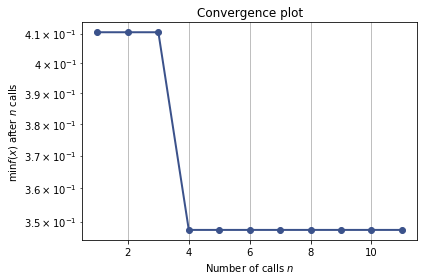

In [134]:
print(search_result.x)
print(search_result.fun)
plot = plot_convergence(search_result,yscale="log")

In [24]:
fitness([2500, 512, 722, 2, 2048, 256, 0.0001, 0.3948527313133352])

12-Mar-21 08:43:17 - Found 2 unique labels.
12-Mar-21 08:43:18 - Number of parameters 60407240
12-Mar-21 08:43:18 - Starting training for 722 epochs
12-Mar-21 08:43:19 - epoch 0, mean loss per batch 0.34796875657943577
12-Mar-21 08:43:21 - epoch 1, mean loss per batch 0.06861647848899548
12-Mar-21 08:43:22 - epoch 2, mean loss per batch 0.013529577937263709
12-Mar-21 08:43:24 - epoch 3, mean loss per batch 0.004278961434745445
12-Mar-21 08:43:25 - epoch 4, mean loss per batch 0.0020166456412810544
12-Mar-21 08:43:27 - epoch 5, mean loss per batch 0.00129849163036292
12-Mar-21 08:43:28 - epoch 6, mean loss per batch 0.000963668804615736
12-Mar-21 08:43:29 - epoch 7, mean loss per batch 0.0007562956956322663
12-Mar-21 08:43:31 - epoch 8, mean loss per batch 0.0005833762339674509
12-Mar-21 08:43:32 - epoch 9, mean loss per batch 0.0004797438752855389
12-Mar-21 08:43:34 - epoch 10, mean loss per batch 0.00041483253545056167
12-Mar-21 08:43:35 - epoch 11, mean loss per batch 0.0003437941217

DEV F1-score 0.9448405419280588
TEST  F1-score 0.9326867630308513


0.055159458071941225